# Decision Tree

In [68]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder



In [69]:
iris= sns.load_dataset("iris")
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
75,6.6,3.0,4.4,1.4,versicolor
63,6.1,2.9,4.7,1.4,versicolor
103,6.3,2.9,5.6,1.8,virginica
51,6.4,3.2,4.5,1.5,versicolor
130,7.4,2.8,6.1,1.9,virginica
104,6.5,3.0,5.8,2.2,virginica
1,4.9,3.0,1.4,0.2,setosa
97,6.2,2.9,4.3,1.3,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [70]:
X=iris.iloc[:,0:4]
y=iris.iloc[:,4]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10, 
                                                    train_size= 0.80, 
                                                    stratify=iris["species"])

In [72]:
y_test.value_counts()

species
versicolor    10
setosa        10
virginica     10
Name: count, dtype: int64

In [73]:
y_train.value_counts()

species
virginica     40
versicolor    40
setosa        40
Name: count, dtype: int64

In [74]:
le=LabelEncoder()
le

LabelEncoder()

In [75]:
y_train_enc=le.fit_transform(y_train)

In [76]:
y_test_enc= le.transform(y_test)

In [77]:
y_test_enc

array([1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2,
       2, 0, 0, 1, 1, 0, 1, 1])

In [86]:
dtc=DecisionTreeClassifier(min_samples_leaf=10)
dtc

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [79]:
dtc.fit(x_train, y_train_enc)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [80]:
confusion_matrix(y_true=y_train_enc, y_pred=dtc.predict(x_train))

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

In [81]:
confusion_matrix(y_true=y_test_enc, y_pred=dtc.predict(x_test))

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [82]:
accuracy_score(y_true=y_train_enc, y_pred=dtc.predict(x_train)),
accuracy_score(y_true=y_test_enc, y_pred=dtc.predict(x_test))

1.0

In [83]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'x[2] <= 2.7\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.4090909090909091, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4545454545454546, 0.8, 'True  '),
 Text(0.5909090909090909, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.5454545454545454, 0.8, '  False'),
 Text(0.36363636363636365, 0.5, 'x[2] <= 4.95\ngini = 0.201\nsamples = 44\nvalue = [0, 39, 5]'),
 Text(0.18181818181818182, 0.3, 'x[0] <= 5.35\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.09090909090909091, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.5454545454545454, 0.3, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.45454545454545453, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6363636363636364, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.8181818181818182, 0.5, 'x[2] <= 4.95\ngin

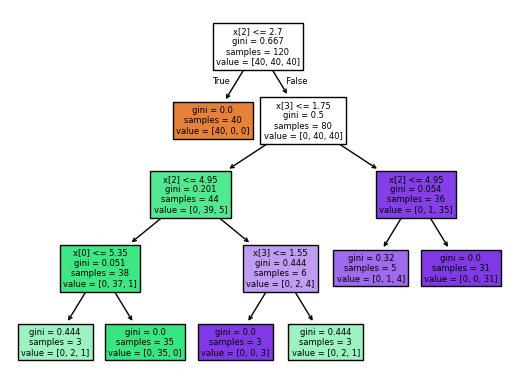

In [84]:
plot_tree(dtc,filled=True)